# Black Friday - Areej  

### What we are going to do and gain from this analyzing set? 
We aim to analyze Black Friday Sales season, in order to gain
usefull facts and information that may help stores
of knowing their customers behavior, needs of products and keep the 
track of the business growthing well in future years.

### 1.1 Importing Data

In [408]:
# Here I am going to start with the important pkgs for analyzing set of data
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
data = pd.read_csv('BlackFriday.csv') # Loading and reading data from the file
print(data.shape) # Show me data Rows and Columns 

(537577, 12)


# We've 537577 Rows and 12 Columns

In [409]:
data.head() # print (by defult cases) 5 values and we can select what we need or how much values

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### 1.2 Data Infromation 

In [410]:
data.info() #Display all infromation for the statistics and data in the table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


Above we've display all infromation for the statistics and data in the table

### Summary :-

1- There are different types of data flow between ( int, float, string, and categorical. )

2- Product_Category_2, Product_Category_3 both are having some missing (Null) values which we are going to fix.


## Uni-variate analysis

 In uni-varite analysis, we can analyze numric variables and categorical variables.


### 1.3 Numric variables

In the numric analyzing section, we will form the extracted data into useful description Max, Min values counting the quartiles measure the mean and STD.


In [411]:
data.describe() # analyze the numeric variables

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


 #### Conclusions:
1. User_ID have strange values that unneeded.
2. Mean, std having small gaps except for product categories.


### 1.4 Categorical variables

In the categorical analysis, we organize the data contain obejct type to give us categorical data with .  

In [412]:
data.describe(include = ['O']) # analyze the categorical variables

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,537577,537577,537577,537577,537577
unique,3623,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1858,405380,214690,226493,189192


 Conclusions: 
 1. Male are the most who were shopping at Black Friday ( 405380 out of 537577 ) 
 2. range of age between 26-35 ( 214690 out of 405380 ).
 3. Top city was B with 226493	orders.
 4. Top ordered product was named with barcode number as P00265242, 1858 times.
 

#### Top 5 products 

In [413]:
#lets see what are the top 5 products were ordered 
data['Product_ID'].value_counts().head()

P00265242    1858
P00110742    1591
P00025442    1586
P00112142    1539
P00057642    1430
Name: Product_ID, dtype: int64

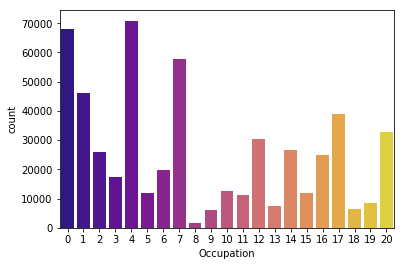

In [414]:
sns.countplot(data['Occupation'],palette='plasma')

In [415]:
data['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

People work with job type (4) purches the most at this black friday season sales however, 8 are the least.

In [416]:
data['Gender'].value_counts().head()

M    405380
F    132197
Name: Gender, dtype: int64

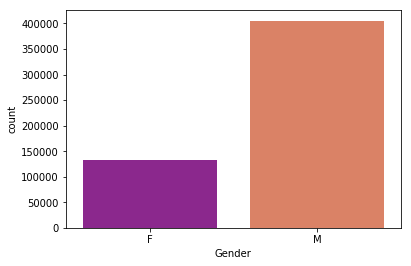

In [417]:
sns.countplot(data['Gender'],palette='plasma')

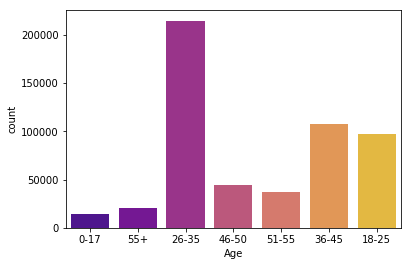

In [418]:
sns.countplot(data['Age'],palette='plasma')

In [419]:
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [420]:
#Divide Age into categories
data['Age'].value_counts().head(7)

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

We can see that there are 7 categories of Age, and it show 
us people between 26-35 ordered more than 200000 purches.

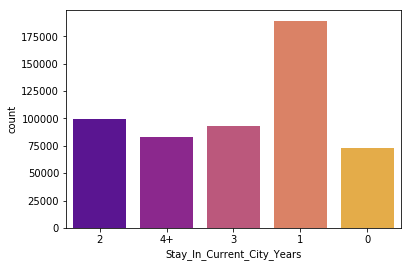

In [421]:
sns.countplot(data['Stay_In_Current_City_Years'],palette='plasma')

People who stay 1 year tends to purchase more.

### Multi-variate analysis

In [422]:
data[['Gender','Purchase']].groupby(['Gender'], as_index = False).mean().sort_values(by='Purchase',ascending=False)


,Gender,Purchase
1,M,9504.771713
0,F,8809.761349


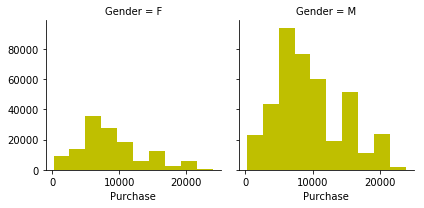

In [423]:
#Here I am using both gender and purchase 
G_Purchase = sns.FacetGrid(data, col='Gender')
G_Purchase.map(plt.hist, 'Purchase',color ='y')
# F -> female
# M -> male

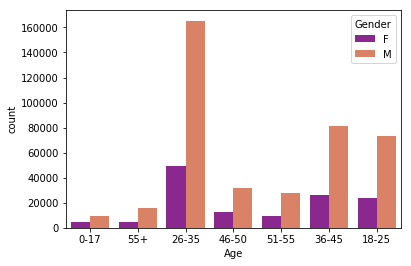

In [424]:
sns.countplot(data['Age'],hue=data['Gender'],palette='plasma')

~75% Male and ~25% Female.

In [425]:
data[['City_Category','Purchase']].groupby(['City_Category'], as_index = False).mean().sort_values(by='Purchase',ascending=False)

,City_Category,Purchase
2,C,9844.441855
1,B,9198.657848
0,A,8958.011014


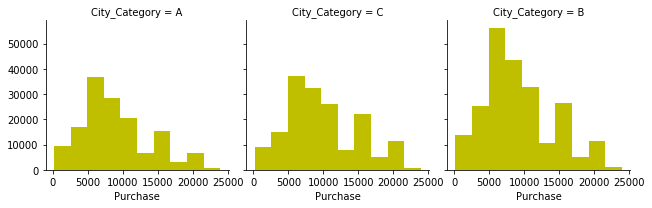

In [426]:
City_Purchase = sns.FacetGrid(data, col='City_Category')
City_Purchase.map(plt.hist, 'Purchase',color ='y')

Conclusions:
    As we said earlier, that City B at the top cites with 226493 purchase .

In [427]:
data[['Marital_Status','Purchase']].groupby(['Marital_Status'], as_index = False).mean().sort_values(by='Purchase',ascending=False)

,Marital_Status,Purchase
1,1,9334.632681
0,0,9333.325467


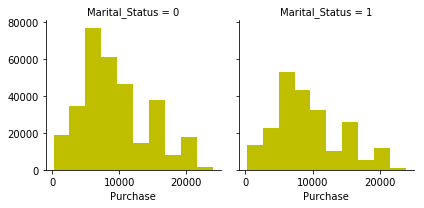

In [428]:
Marital_Purchase = sns.FacetGrid(data, col='Marital_Status')
Marital_Purchase.map(plt.hist, 'Purchase',color ='y')

# 1 means married
# 0 means single

Conclusions:
    Single used to shop more than married.

In [429]:
data[['Age','Purchase']].groupby(['Age'], as_index = False).mean().sort_values(by='Purchase',ascending=False)

,Age,Purchase
5,51-55,9620.616620
6,55+,9453.898579
3,36-45,9401.478758
2,26-35,9314.588970
4,46-50,9284.872277
1,18-25,9235.197575
0,0-17,9020.126878


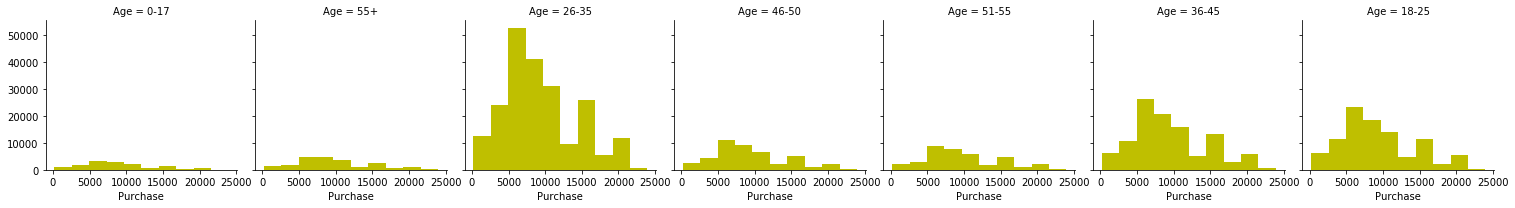

In [430]:
age_p = sns.FacetGrid(data, col='Age')
age_p.map(plt.hist, 'Purchase',color ='y')

Conclusions:
    1. Age from 26 - 35 are the top shoppers in Black Friday sales, 
    then (35-45),(18-25),(45,50),(55+) and lastly (0-17).
 

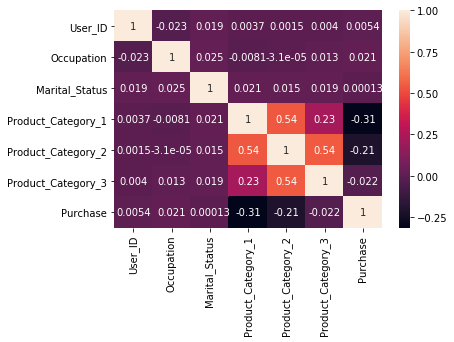

In [431]:
sns.heatmap(data.corr(),annot=True)

There are correlation between the product categories.

### 1.5 Data Cleansing

#### 1-Scrubing missing values

As we have stated 
1.Product_Category_2 370591 non-null float64 and
Product_Category_3 164278 non-null float64
having missing values we need to deal with them filling up them or giving them 0 values.
2. User_ID is alredy a uniqe value that unneeded.


In [432]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

I will fill them with the most random values as long as each catgory will not effect our data set that much.

In [433]:
data['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [434]:
data['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [435]:
data.fillna(0,inplace=True)

Drop User_ID as it is not needed.

In [436]:
data.drop(['User_ID'], axis = 1, inplace=True)

In [437]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 11 columns):
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Product_Category_3            537577 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 45.1+ MB


As we can see that all columns now are good and without any missing data but we have
Product_Category_1 is as int type so we need to convert 2,3 to int
also just to keep it neat and stable.

In [438]:
# we have seen that Product_Category_1 is int type so we need to convert 2,3 to int also
data.Product_Category_2 = data.Product_Category_2.astype('int64')
data.Product_Category_3 = data.Product_Category_3.astype('int64')

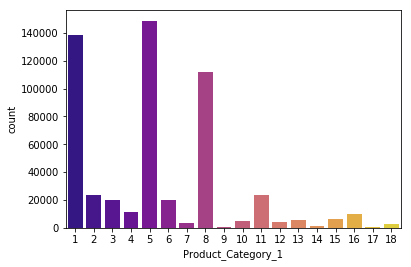

In [439]:
sns.countplot(data['Product_Category_1'],palette='plasma')

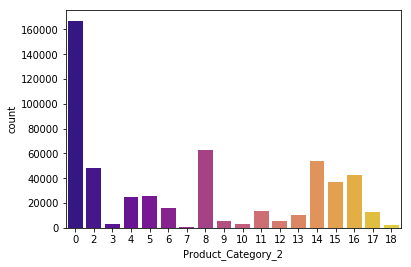

In [440]:
sns.countplot(data['Product_Category_2'],palette='plasma')

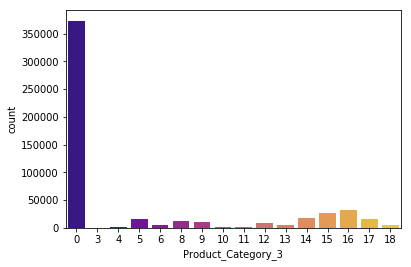

In [441]:
sns.countplot(data['Product_Category_3'],palette='plasma')

### 1.6 Handling Outliers

In [442]:
data.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,8.08271,0.408797,5.295546,6.784907,3.871773,9333.859853
std,6.52412,0.491612,3.750701,6.211618,6.265963,4981.022133
min,0.00000,0.000000,1.000000,0.000000,0.000000,185.000000
25%,2.00000,0.000000,1.000000,0.000000,0.000000,5866.000000
50%,7.00000,0.000000,5.000000,5.000000,0.000000,8062.000000
75%,14.00000,1.000000,8.000000,14.000000,8.000000,12073.000000
max,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


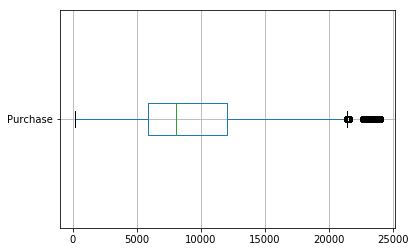

In [443]:
data.boxplot(['Purchase'], vert = False)

In [444]:
data[data['Purchase']== data['Purchase'].max()]

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
87440,P00052842,M,26-35,4,A,2,1,10,15,0,23961
93016,P00052842,M,26-35,0,C,1,0,10,15,0,23961
370891,P00052842,M,26-35,17,C,3,0,10,15,0,23961


### 1.7 Features Engineering

1. We have some + signs which may affect ML analysis so we will erase it.
2. Convert some values into numerical values for ML analysis purposes.

In [445]:
data['Stay_In_Current_City_Years']=(data['Stay_In_Current_City_Years'].str.strip('+'))

In [446]:
data['Stay_In_Current_City_Years'].value_counts()

1    189192
2     99459
3     93312
4     82889
0     72725
Name: Stay_In_Current_City_Years, dtype: int64

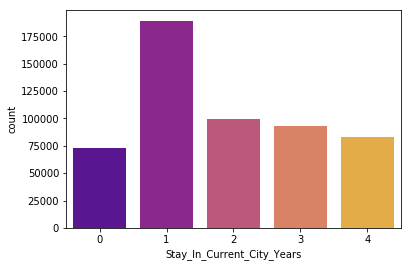

In [447]:
sns.countplot(data['Stay_In_Current_City_Years'],palette='plasma')

In [448]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,P00285442,M,55+,16,C,4,0,8,0,0,7969


In [449]:
Gender_binary = {'F':0,'M':1}
data['Gender'] = data['Gender'].apply(lambda line: Gender_binary[line])

In [452]:
data['Gender'].value_counts()

1    405380
0    132197
Name: Gender, dtype: int64

In [451]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,0,0,8370
1,P00248942,0,0-17,10,A,2,0,1,6,14,15200
2,P00087842,0,0-17,10,A,2,0,12,0,0,1422
3,P00085442,0,0-17,10,A,2,0,12,14,0,1057
4,P00285442,1,55+,16,C,4,0,8,0,0,7969


### Summary :

1. ~75% were male and ~25% were female.
2. Single attend to shop more than married, but they are equally pureshes comparing the money.
3. Range of Age from 26 - 35 were the top shoppers in Black Friday sales, 
then (35-45),(18-25),(45,50),(55+) and lastly (0-17).
4. City B was at the top cites with 226493.
5. People who stay 1 year tends to purchase more.


### Recommendations : 
1. More family offers will be a good deal to growth sellers purchase more and more next years.
2. Focusing on online surveies and giving some rewards after finishing it would refresh datasets and beneficial for both organizations and we ( As data analysis scientist ).
